In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

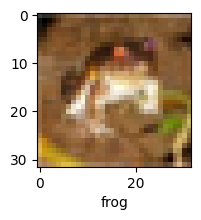

In [10]:
plot_sample(X_train, y_train, 0)

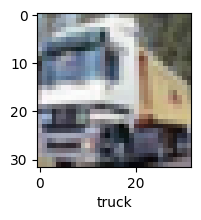

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

e:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
 959/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.2815 - loss: 1.9858

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.58      0.53      1000
           1       0.63      0.60      0.62      1000
           2       0.50      0.13      0.21      1000
           3       0.38      0.33      0.35      1000
           4       0.34      0.56      0.43      1000
           5       0.46      0.30      0.36      1000
           6       0.46      0.65      0.54      1000
           7       0.67      0.41      0.51      1000
           8       0.48      0.74      0.58      1000
           9       0.60      0.51      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

e:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.3701 - loss: 1.7188
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5951 - loss: 1.1550
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6484 - loss: 1.0137
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6815 - loss: 0.9184
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7074 - loss: 0.8370
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7279 - loss: 0.7799
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7441 - loss: 0.7332
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7648 - loss: 0.6748
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7758 - loss: 0.6406
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7863 - loss: 0.6018


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6943 - loss: 0.9291


[0.9420920610427856, 0.6912000179290771]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[3.84778279e-04, 1.22136131e-04, 1.05211895e-03, 9.44725275e-01,
        1.88474674e-04, 3.94203402e-02, 6.53610192e-03, 2.32413557e-04,
        7.27127586e-03, 6.69829897e-05],
       [8.71125550e-04, 3.34095471e-02, 4.01092365e-07, 1.59317199e-08,
        2.45568366e-08, 7.81570186e-09, 1.00799520e-08, 1.71165637e-10,
        9.62948322e-01, 2.77048908e-03],
       [7.13413805e-02, 7.06818640e-01, 1.28549116e-03, 4.33540205e-03,
        1.21041411e-03, 7.75918597e-04, 1.48746383e-03, 2.44619063e-04,
        1.74449354e-01, 3.80512290e-02],
       [9.63532448e-01, 1.36296649e-03, 9.01509949e-04, 9.72285343e-04,
        4.36760893e-04, 1.20162349e-05, 1.03084756e-04, 7.17292278e-06,
        3.25867087e-02, 8.51140212e-05],
       [5.17611224e-05, 9.07766458e-04, 4.89373729e-02, 3.81454639e-02,
        4.69738916e-02, 1.32656908e-02, 8.49902630e-01, 5.12250874e-04,
        1.21879019e-03, 8.43420348e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

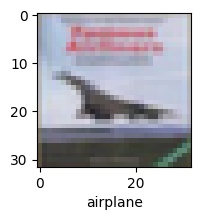

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'